In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.6/749.6 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 79.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

#Import Libraries

In [ ]:
#imports
import math
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os
import PIL, urllib
import zipfile
from IPython.display import display

# YOLO

In [ ]:
from ultralytics import YOLO

# Load a COCO-pretrained YOLOv8n model
yoloModel = YOLO('yolov8n.pt')

# Display model information (optional)
yoloModel.info()
print(yoloModel.names)
img = PIL.Image.open('y4.png')

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop',

In [ ]:
result = yoloModel(img)
print(result[0].names)
for box in result[0].boxes:
  if result[0].names[box.cls.item()] == "traffic light":
    xyxy = box.xyxy.tolist()
    print(xyxy)
    img = img.crop(xyxy[0])
    print(img)
    display(img)
#print(result[0].boxes.xyxyn)
#


0: 640x352 (no detections), 1070.4ms
Speed: 16.5ms preprocess, 1070.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 352)
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59:

In [ ]:
!pip install roboflow

In [ ]:
!mkdir /content/datasets

In [ ]:
%cd datasets

/content/datasets


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="")
project = rf.workspace("seb-bulba").project("roadsigns_2")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.40, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to roadsigns_2-2 in yolov8:: 100%|██████████| 1230/1230 [00:00<00:00, 2622.99it/s]


In [ ]:
%cd ..

/content


In [ ]:
!yolo
task=detect
mode=train
model=yolov8n.pt
data= /content/datasets/road_signs/data.yaml
epochs =20
imgsz=400

100% 6.23M/6.23M [00:00<00:00, 78.5MB/s]
Ultralytics YOLOv8.1.40 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/road_signs/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=400, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt source= 'sign.png'

Ultralytics YOLOv8.1.39 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/1 /content/sign.png: 448x640 1 car, 452.1ms
Speed: 15.0ms preprocess, 452.1ms inference, 3.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


Signs that can be detected by yolo:
- stop
- no right turn
- school zone
- do not enter
- yield
- children



0: 288x416 1 agat, 257.6ms
Speed: 2.4ms preprocess, 257.6ms inference, 1.2ms postprocess per image at shape (1, 3, 288, 416)
{0: 'agat', 1: 'dr_jed', 2: 'dr_pier', 3: 'dzieci_o', 4: 'in', 5: 'inf', 6: 'kier_pas', 7: 'kon_dr', 8: 'kon_park', 9: 'n_prawza', 10: 'n_zpraw', 11: 'ogr_pred', 12: 'park', 13: 'piesz', 14: 'prog', 15: 'przeb_dr1', 16: 'r_okr', 17: 'stop', 18: 'ustap', 19: 'z_obu', 20: 'z_pz', 21: 'z_wj', 22: 'z_wjciez', 23: 'z_wyprz', 24: 'z_zatrz', 25: 'zam'}
[[223.32098388671875, 8.693758964538574, 652.2451171875, 406.3544006347656]]


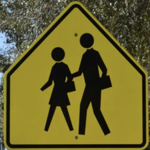

In [ ]:
img = PIL.Image.open('/content/Screenshot 2024-04-01 at 00.04.25.png').convert("RGB")
from ultralytics import YOLO
model = YOLO("/content/runs/detect/train/weights/best.pt")
class_names = ['class1', 'class2', 'class3']
result = model(img)
print(result[0].names)
for box in result[0].boxes:
  if result[0].names[box.cls.item()]:
    xyxy = box.xyxy.tolist()
    print(xyxy)
    img = img.crop(xyxy[0])
    img = img.resize((150,150))
    img.save('/content/gdrive/My Drive/your_image.jpg')
    display(img)

In [ ]:
!cp /content/yolov8n.pt -r /content/gdrive/MyDrive

# Helper Functions

In [ ]:
'''
HELPER FUNCTIONS
'''

def get_model_name(name, batch_size, learning_rate, epoch):
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def get_dir(name, batch_size, learning_rate, timestamp):
    dir = "model_{0}_bs{1}_lr{2}_{3}/".format(name,
                                        batch_size,
                                        learning_rate,
                                        timestamp
                                        )
    return dir

def evaluate(net, loader, criterion):
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0

    for i, data in enumerate(loader, 0):
        inputs, labels = data
        outputs = net(inputs)
        notonehot_labels = torch.argmax(labels, 1)
        loss = criterion(outputs, notonehot_labels)

        max_value, predicted_output = torch.max(outputs, 1)
        true_output = torch.argmax(labels, 1)
        corr = (predicted_output != true_output)
        total_err += int(corr.sum())

        total_loss += loss.item()
        total_epoch += len(labels)
    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss

def evaluate_test(net, loader, criterion):
    total_loss = 0.0
    total_err = 0.0
    total_epoch = 0

    predicted_list = []
    true_list = []

    for i, data in enumerate(loader, 0):
        inputs, labels = data
        outputs = net(inputs)
        notonehot_labels = torch.argmax(labels, 1)
        loss = criterion(outputs, notonehot_labels)

        max_value, predicted_output = torch.max(outputs, 1)
        true_output = torch.argmax(labels, 1)
        #####
        #print("predicted output: ", predicted_output)
        #print("----------------")
        #print("true output: ", true_output)
        predicted_list += predicted_output.tolist()
        true_list += true_output.tolist()
        #####
        corr = (predicted_output != true_output)
        total_err += int(corr.sum())

        total_loss += loss.item()
        total_epoch += len(labels)
    err = float(total_err) / total_epoch
    loss = float(total_loss) / (i + 1)
    return err, loss, predicted_list, true_list

def plot_training_curve(path):
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

def load_from_drive(path, signs_dict, transform, balancer=250):
    dataset = []
    num_classes = len(signs_dict)
    for sign_type, index in signs_dict.items():
        zip_path = path +  f"/{sign_type}.zip"
        print("currently loading: ", zip_path)
        i = 0
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            for entry in zip_ref.infolist():
                if(i > balancer): # temporary way to balance dataset
                    break
                if(not entry.is_dir() and (
                entry.filename.lower().endswith('.jpg') or
                entry.filename.lower().endswith('.jpeg') or
                entry.filename.lower().endswith('.png'))):
                    with zip_ref.open(entry) as file:
                        img = PIL.Image.open(file).convert("RGB")
                        tensor_img = transform(img)
                        dataset.append((tensor_img, one_hot_encode(index, num_classes)))
                    i += 1
    return dataset

def one_hot_encode(label, num_classes):
    one_hot = np.zeros(num_classes)
    one_hot[label] = 1
    return torch.tensor(one_hot)


def get_data_loader(batch_size, train_percent=0.8, val_percent=0.1, balancer=250):
    # one hot encoding for all tyes of signs
    signs_dict = {
        'chevron': 0,
        'parking': 1,
        'pedestrian_cross': 2,
        'bicycle_only': 3,
        'keep_right': 4,
        'speed_limit': 5,
        'no_entry': 6,
        'no_heavy_vehicles': 7,
        'no_left_turn': 8,
        'no_overtaking': 9,
        'no_parking': 10,
        'no_right_turn': 11,
        'no_uturn': 12,
        'one_way_left': 13,
        'one_way_right': 14,
        'one_way_straight': 15,
        'stop': 16,
        'yield': 17,
        'children': 18,
        'curve_left': 19,
        'curve_right': 20,
        'road_bump': 21,
        'school_zone': 22,
        'stop_ahead': 23,
        'traffic_signal_ahead': 24,
        'merge_right': 25
    }

    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

    path = f"/content/gdrive/MyDrive/dataset_imgs/dataset_v2" #CHANGE LATER
    dataset = load_from_drive(path, signs_dict, transform, balancer)

    # Get the list of indices to sample from
    relevant_indices = [i for i in range(len(dataset))]

    np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
    np.random.shuffle(relevant_indices)
    train_split = int(len(relevant_indices) * train_percent) #split at 80% for training
    val_split = int(len(relevant_indices) * val_percent) #split at 10% for validation
    # 10% for testing

    # Split into training, validation and testing sets
    relevant_train_indices = relevant_indices[:train_split]
    relevant_val_indices = relevant_indices[train_split:train_split + val_split]
    relevant_test_indices = relevant_indices[train_split + val_split:]

    train_sampler = SubsetRandomSampler(relevant_train_indices)
    train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                            num_workers=1, sampler=train_sampler)
    val_sampler = SubsetRandomSampler(relevant_val_indices)
    val_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                            num_workers=1, sampler=val_sampler)

    test_sampler = SubsetRandomSampler(relevant_test_indices)
    test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                             num_workers=1, sampler=test_sampler)
    return train_loader, val_loader, test_loader

In [ ]:
def get_conv_output(conv_params, maxpool_params, tensor_input_size):
    out_channels = conv_params[-1]['out_channels']
    out = tensor_input_size
    for conv in conv_params:
        # conv layer
        out = math.floor((out + 2 * conv['padding'] - conv['kernel_size']) /
                         conv['stride']) + 1
        # max pooling
        out = math.floor((out - maxpool_params['kernel_size']) /
                         maxpool_params['stride']) + 1

    return out_channels * out * out

# train_net Function

In [ ]:
def train_net(net, train_loader, val_loader, batch_size=64, learning_rate=0.01, num_epochs=30, path=""):
    from datetime import datetime
    import pytz
    desired_timezone = 'US/Eastern'
    current_timestamp = datetime.now(pytz.timezone(desired_timezone))
    timestamp_string = current_timestamp.strftime("%Y-%m-%d_%H:%M:%S")

    torch.manual_seed(1000)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)

    start_time = time.time()
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = net(inputs)
            notonehot_labels = torch.argmax(labels, 1)

            loss = criterion(outputs, notonehot_labels)
            loss.backward()
            optimizer.step()

            max_value, predicted_output = torch.max(outputs, 1)
            true_output = torch.argmax(labels, 1)
            corr = (predicted_output != true_output)
            total_train_err += int(corr.sum())
            total_train_loss += loss.item()
            total_epoch += len(labels)

        train_err[epoch] = float(total_train_err) / total_epoch
        train_loss[epoch] = float(total_train_loss) / (i+1)
        val_err[epoch], val_loss[epoch] = evaluate(net, val_loader, criterion)
        print(("Epoch {}: Train err: {}, Train loss: {} |"+
               "Validation err: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_err[epoch],
                   train_loss[epoch],
                   val_err[epoch],
                   val_loss[epoch]))

        directory = path + get_dir(net.name, batch_size, learning_rate, timestamp_string)
        if not os.path.exists(directory):
            os.makedirs(directory)

        model_path = directory + get_model_name(net.name, batch_size, learning_rate, epoch)
        torch.save(net.state_dict(), model_path)
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    epochs = np.arange(1, num_epochs + 1)
    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

# Model Architecture (s)

In [ ]:
'''
model architecture
'''
class CNN_v1(nn.Module):
    def __init__(self):
        super(CNN_v1, self).__init__()
        self.name = "cnnv1"
        # format assumes a conv -> maxpool -> conv -> maxpool -> ... structure
        conv_params = [
            {'in_channels': 3, 'out_channels': 8, 'kernel_size': 3, 'stride': 2, 'padding': 1},
            {'in_channels': 8, 'out_channels': 16, 'kernel_size': 3, 'stride': 1, 'padding': 0}
        ]
        maxpool_params = {'kernel_size': 2, 'stride': 2}
        self.conv0 = nn.Conv2d(conv_params[0]['in_channels'],
                               conv_params[0]['out_channels'],
                               conv_params[0]['kernel_size'],
                               conv_params[0]['stride'],
                               conv_params[0]['padding'])

        self.pool = nn.MaxPool2d(maxpool_params['kernel_size'],
                                 maxpool_params['stride'])

        self.conv1 = nn.Conv2d(conv_params[1]['in_channels'],
                               conv_params[1]['out_channels'],
                               conv_params[1]['kernel_size'],
                               conv_params[1]['stride'],
                               conv_params[1]['padding'])

        tensor_input_size = 150
        self.conv_output = get_conv_output(conv_params, maxpool_params, tensor_input_size)
        self.fc1 = nn.Linear(self.conv_output, 244) #change later
        self.fc2 = nn.Linear(244, 26)

    def forward(self, img):
        x = self.pool(F.relu(self.conv0(img)))
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, self.conv_output) # change later
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
class CNN_v2(nn.Module): # more output channels, no padding, no more stride
    def __init__(self):
        super(CNN_v2, self).__init__()
        self.name = "cnnv2"
        # format assumes a conv -> maxpool -> conv -> maxpool -> ... structure
        conv_params = [
            {'in_channels': 3, 'out_channels': 8, 'kernel_size': 3, 'stride': 1, 'padding': 0},
            {'in_channels': 8, 'out_channels': 16, 'kernel_size': 3, 'stride': 1, 'padding': 0},
            {'in_channels': 16, 'out_channels': 32, 'kernel_size': 3, 'stride': 1, 'padding': 0},
        ]
        maxpool_params = {'kernel_size': 2, 'stride': 2}
        self.conv0 = nn.Conv2d(conv_params[0]['in_channels'],
                               conv_params[0]['out_channels'],
                               conv_params[0]['kernel_size'],
                               conv_params[0]['stride'],
                               conv_params[0]['padding'])

        self.pool = nn.MaxPool2d(maxpool_params['kernel_size'],
                                 maxpool_params['stride'])

        self.conv1 = nn.Conv2d(conv_params[1]['in_channels'],
                               conv_params[1]['out_channels'],
                               conv_params[1]['kernel_size'],
                               conv_params[1]['stride'],
                               conv_params[1]['padding'])

        self.conv2 = nn.Conv2d(conv_params[2]['in_channels'],
                               conv_params[2]['out_channels'],
                               conv_params[2]['kernel_size'],
                               conv_params[2]['stride'],
                               conv_params[2]['padding'])

        tensor_input_size = 150
        self.conv_output = get_conv_output(conv_params, maxpool_params, tensor_input_size)
        self.fc1 = nn.Linear(self.conv_output, 244) #change later
        self.fc2 = nn.Linear(244, 26)

    def forward(self, img):
        x = self.pool(F.relu(self.conv0(img)))
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, self.conv_output) # change later
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
class CNN_v3(nn.Module): # no padding, slightly less output channels
    def __init__(self):
        super(CNN_v3, self).__init__()
        self.name = "cnnv3"
        # format assumes a conv -> maxpool -> conv -> maxpool -> ... structure
        conv_params = [
            {'in_channels': 3, 'out_channels': 3, 'kernel_size': 3, 'stride': 1, 'padding': 0},
            {'in_channels': 3, 'out_channels': 8, 'kernel_size': 3, 'stride': 1, 'padding': 0},
            {'in_channels': 8, 'out_channels': 16, 'kernel_size': 3, 'stride': 1, 'padding': 0},
        ]
        maxpool_params = {'kernel_size': 2, 'stride': 2}
        self.conv0 = nn.Conv2d(conv_params[0]['in_channels'],
                               conv_params[0]['out_channels'],
                               conv_params[0]['kernel_size'],
                               conv_params[0]['stride'],
                               conv_params[0]['padding'])

        self.pool = nn.MaxPool2d(maxpool_params['kernel_size'],
                                 maxpool_params['stride'])

        self.conv1 = nn.Conv2d(conv_params[1]['in_channels'],
                               conv_params[1]['out_channels'],
                               conv_params[1]['kernel_size'],
                               conv_params[1]['stride'],
                               conv_params[1]['padding'])

        self.conv2 = nn.Conv2d(conv_params[2]['in_channels'],
                               conv_params[2]['out_channels'],
                               conv_params[2]['kernel_size'],
                               conv_params[2]['stride'],
                               conv_params[2]['padding'])

        tensor_input_size = 150
        self.conv_output = get_conv_output(conv_params, maxpool_params, tensor_input_size)
        self.fc1 = nn.Linear(self.conv_output, 244) #change later
        self.fc2 = nn.Linear(244, 26)

    def forward(self, img):
        x = self.pool(F.relu(self.conv0(img)))
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, self.conv_output) # change later
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
class CNN_v4(nn.Module): # more layers, consistent # of output channels
    def __init__(self):
        super(CNN_v4, self).__init__()
        self.name = "cnnv4"
        # format assumes a conv -> maxpool -> conv -> maxpool -> ... structure
        conv_params = [
            {'in_channels': 3, 'out_channels': 8, 'kernel_size': 2, 'stride': 1, 'padding': 0},
            {'in_channels': 8, 'out_channels': 8, 'kernel_size': 2, 'stride': 1, 'padding': 0},
            {'in_channels': 8, 'out_channels': 8, 'kernel_size': 2, 'stride': 1, 'padding': 0},
            {'in_channels': 8, 'out_channels': 8, 'kernel_size': 2, 'stride': 1, 'padding': 0},
            {'in_channels': 8, 'out_channels': 8, 'kernel_size': 2, 'stride': 1, 'padding': 0}
        ]
        maxpool_params = {'kernel_size': 2, 'stride': 2}
        self.conv0 = nn.Conv2d(conv_params[0]['in_channels'],
                               conv_params[0]['out_channels'],
                               conv_params[0]['kernel_size'],
                               conv_params[0]['stride'],
                               conv_params[0]['padding'])

        self.pool = nn.MaxPool2d(maxpool_params['kernel_size'],
                                 maxpool_params['stride'])

        self.conv1 = nn.Conv2d(conv_params[1]['in_channels'],
                               conv_params[1]['out_channels'],
                               conv_params[1]['kernel_size'],
                               conv_params[1]['stride'],
                               conv_params[1]['padding'])

        self.conv2 = nn.Conv2d(conv_params[2]['in_channels'],
                               conv_params[2]['out_channels'],
                               conv_params[2]['kernel_size'],
                               conv_params[2]['stride'],
                               conv_params[2]['padding'])

        self.conv3 = nn.Conv2d(conv_params[3]['in_channels'],
                               conv_params[3]['out_channels'],
                               conv_params[3]['kernel_size'],
                               conv_params[3]['stride'],
                               conv_params[3]['padding'])

        self.conv4 = nn.Conv2d(conv_params[4]['in_channels'],
                               conv_params[4]['out_channels'],
                               conv_params[4]['kernel_size'],
                               conv_params[4]['stride'],
                               conv_params[4]['padding'])

        tensor_input_size = 150
        self.conv_output = get_conv_output(conv_params, maxpool_params, tensor_input_size)
        self.fc1 = nn.Linear(self.conv_output, 244) #change later
        self.fc2 = nn.Linear(244, 26)

    def forward(self, img):
        x = self.pool(F.relu(self.conv0(img)))
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(-1, self.conv_output) # change later
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
class CNN_v5(nn.Module): # like CNN_v1 but with more linear layers
    def __init__(self):
        super(CNN_v5, self).__init__()
        self.name = "cnnv5"
        # format assumes a conv -> maxpool -> conv -> maxpool -> ... structure
        conv_params = [
            {'in_channels': 3, 'out_channels': 8, 'kernel_size': 3, 'stride': 2, 'padding': 1},
            {'in_channels': 8, 'out_channels': 16, 'kernel_size': 3, 'stride': 1, 'padding': 0}
        ]
        maxpool_params = {'kernel_size': 2, 'stride': 2}
        self.conv0 = nn.Conv2d(conv_params[0]['in_channels'],
                               conv_params[0]['out_channels'],
                               conv_params[0]['kernel_size'],
                               conv_params[0]['stride'],
                               conv_params[0]['padding'])

        self.pool = nn.MaxPool2d(maxpool_params['kernel_size'],
                                 maxpool_params['stride'])

        self.conv1 = nn.Conv2d(conv_params[1]['in_channels'],
                               conv_params[1]['out_channels'],
                               conv_params[1]['kernel_size'],
                               conv_params[1]['stride'],
                               conv_params[1]['padding'])

        tensor_input_size = 150
        self.conv_output = get_conv_output(conv_params, maxpool_params, tensor_input_size)
        self.fc1 = nn.Linear(self.conv_output, 1000) #change later
        self.fc2 = nn.Linear(1000, 500)
        self.fc3 = nn.Linear(500, 250)
        self.fc4 = nn.Linear(250, 26)

    def forward(self, img):
        x = self.pool(F.relu(self.conv0(img)))
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, self.conv_output) # change later
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x



In [ ]:
class CNN_v6(nn.Module): # more padding
    def __init__(self):
        super(CNN_v6, self).__init__()
        self.name = "cnnv6"
        # format assumes a conv -> maxpool -> conv -> maxpool -> ... structure
        conv_params = [
            {'in_channels': 3, 'out_channels': 4, 'kernel_size': 3, 'stride': 2, 'padding': 1},
            {'in_channels': 4, 'out_channels': 8, 'kernel_size': 3, 'stride': 2, 'padding': 1},
            {'in_channels': 8, 'out_channels': 16, 'kernel_size': 3, 'stride': 1, 'padding': 1},
            {'in_channels': 16, 'out_channels': 16, 'kernel_size': 3, 'stride': 1, 'padding': 0}
        ]
        maxpool_params = {'kernel_size': 2, 'stride': 2}
        self.conv0 = nn.Conv2d(conv_params[0]['in_channels'],
                               conv_params[0]['out_channels'],
                               conv_params[0]['kernel_size'],
                               conv_params[0]['stride'],
                               conv_params[0]['padding'])

        self.pool = nn.MaxPool2d(maxpool_params['kernel_size'],
                                 maxpool_params['stride'])

        self.conv1 = nn.Conv2d(conv_params[1]['in_channels'],
                               conv_params[1]['out_channels'],
                               conv_params[1]['kernel_size'],
                               conv_params[1]['stride'],
                               conv_params[1]['padding'])

        self.conv2 = nn.Conv2d(conv_params[2]['in_channels'],
                               conv_params[2]['out_channels'],
                               conv_params[2]['kernel_size'],
                               conv_params[2]['stride'],
                               conv_params[2]['padding'])

        self.conv3 = nn.Conv2d(conv_params[3]['in_channels'],
                               conv_params[3]['out_channels'],
                               conv_params[3]['kernel_size'],
                               conv_params[3]['stride'],
                               conv_params[3]['padding'])

        tensor_input_size = 150
        self.conv_output = get_conv_output(conv_params, maxpool_params, tensor_input_size)
        self.fc1 = nn.Linear(self.conv_output, 244) #change later
        self.fc2 = nn.Linear(244, 26)

    def forward(self, img):
        x = self.pool(F.relu(self.conv0(img)))
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, self.conv_output) # change later
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
class CNN_v7(nn.Module): # more padding, and bigger classifer
    def __init__(self):
        super(CNN_v7, self).__init__()
        self.name = "cnnv7"
        # format assumes a conv -> maxpool -> conv -> maxpool -> ... structure
        conv_params = [
            {'in_channels': 3, 'out_channels': 4, 'kernel_size': 3, 'stride': 2, 'padding': 1},
            {'in_channels': 4, 'out_channels': 8, 'kernel_size': 3, 'stride': 2, 'padding': 1},
            {'in_channels': 8, 'out_channels': 16, 'kernel_size': 3, 'stride': 1, 'padding': 1},
            {'in_channels': 16, 'out_channels': 16, 'kernel_size': 3, 'stride': 1, 'padding': 0}
        ]
        maxpool_params = {'kernel_size': 2, 'stride': 2}
        self.conv0 = nn.Conv2d(conv_params[0]['in_channels'],
                               conv_params[0]['out_channels'],
                               conv_params[0]['kernel_size'],
                               conv_params[0]['stride'],
                               conv_params[0]['padding'])

        self.pool = nn.MaxPool2d(maxpool_params['kernel_size'],
                                 maxpool_params['stride'])

        self.conv1 = nn.Conv2d(conv_params[1]['in_channels'],
                               conv_params[1]['out_channels'],
                               conv_params[1]['kernel_size'],
                               conv_params[1]['stride'],
                               conv_params[1]['padding'])

        self.conv2 = nn.Conv2d(conv_params[2]['in_channels'],
                               conv_params[2]['out_channels'],
                               conv_params[2]['kernel_size'],
                               conv_params[2]['stride'],
                               conv_params[2]['padding'])

        self.conv3 = nn.Conv2d(conv_params[3]['in_channels'],
                               conv_params[3]['out_channels'],
                               conv_params[3]['kernel_size'],
                               conv_params[3]['stride'],
                               conv_params[3]['padding'])

        tensor_input_size = 150
        self.conv_output = get_conv_output(conv_params, maxpool_params, tensor_input_size)
        self.fc1 = nn.Linear(self.conv_output, 1000) #change later
        self.fc2 = nn.Linear(1000, 500)
        self.fc3 = nn.Linear(500, 250)
        self.fc4 = nn.Linear(250, 26)

    def forward(self, img):
        x = self.pool(F.relu(self.conv0(img)))
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, self.conv_output) # change later
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [ ]:
conv_params = [
            {'in_channels': 3, 'out_channels': 4, 'kernel_size': 3, 'stride': 2, 'padding': 1},
            {'in_channels': 4, 'out_channels': 8, 'kernel_size': 3, 'stride': 1, 'padding': 1},
            {'in_channels': 8, 'out_channels': 16, 'kernel_size': 3, 'stride': 1, 'padding': 1},
            {'in_channels': 16, 'out_channels': 16, 'kernel_size': 3, 'stride': 1, 'padding': 0}
        ]
maxpool_params = {'kernel_size': 2, 'stride': 2}
print(get_conv_output(conv_params, maxpool_params, 150))
print(math.sqrt(get_conv_output(conv_params, maxpool_params, 150) / (16)))

144
3.0


# DataLoader Code

In [ ]:
# would only run this once per batch size to get consistent data loaders
batch_size = 32
train_loader, val_loader, test_loader = get_data_loader(batch_size, balancer=2000)

currently loading:  /content/gdrive/MyDrive/dataset_imgs/dataset_v2/chevron.zip
currently loading:  /content/gdrive/MyDrive/dataset_imgs/dataset_v2/parking.zip
currently loading:  /content/gdrive/MyDrive/dataset_imgs/dataset_v2/pedestrian_cross.zip
currently loading:  /content/gdrive/MyDrive/dataset_imgs/dataset_v2/bicycle_only.zip
currently loading:  /content/gdrive/MyDrive/dataset_imgs/dataset_v2/keep_right.zip
currently loading:  /content/gdrive/MyDrive/dataset_imgs/dataset_v2/speed_limit.zip
currently loading:  /content/gdrive/MyDrive/dataset_imgs/dataset_v2/no_entry.zip
currently loading:  /content/gdrive/MyDrive/dataset_imgs/dataset_v2/no_heavy_vehicles.zip
currently loading:  /content/gdrive/MyDrive/dataset_imgs/dataset_v2/no_left_turn.zip
currently loading:  /content/gdrive/MyDrive/dataset_imgs/dataset_v2/no_overtaking.zip
currently loading:  /content/gdrive/MyDrive/dataset_imgs/dataset_v2/no_parking.zip
currently loading:  /content/gdrive/MyDrive/dataset_imgs/dataset_v2/no_rig

In [ ]:
def save_data_loader(train_loader, val_loader, test_loader):
    data_loader_path = "/content/gdrive/MyDrive/APS360-Notebooks/Project/data_loader/"
    torch.save(train_loader, data_loader_path + "train_loader.pt")
    torch.save(val_loader, data_loader_path + "val_loader.pt")
    torch.save(test_loader, data_loader_path + "test_loader.pt")

In [ ]:
def load_data_loader():
    torch.load("/content/gdrive/MyDrive/APS360-Notebooks/Project/data_loader/train_loader.pt")
    torch.load("/content/gdrive/MyDrive/APS360-Notebooks/Project/data_loader/val_loader.pt")
    torch.load("/content/gdrive/MyDrive/APS360-Notebooks/Project/data_loader/test_loader.pt")
    return train_loader, val_loader, test_loader


In [ ]:
save_data_loader(train_loader, val_loader, test_loader)

In [ ]:
train_loader, val_loader, test_loader = load_data_loader()

In [ ]:
print(len(train_loader.dataset))

23050
23050


# Training Curves

In [ ]:
net = CNN_v6()
path = "/content/gdrive/MyDrive/APS360-Notebooks/Project/training_output2/"
train_net(net, train_loader, val_loader, batch_size=batch_size, learning_rate=0.001, num_epochs=40, path=path)

Epoch 1: Train err: 0.9132863340563991, Train loss: 3.1475848267355246 |Validation err: 0.9392624728850325, Validation loss: 3.0936908819904065
Epoch 2: Train err: 0.9077006507592191, Train loss: 3.068545190672321 |Validation err: 0.9227765726681127, Validation loss: 3.0797819634006447
Epoch 3: Train err: 0.8787960954446855, Train loss: 3.0595529872788507 |Validation err: 0.9140997830802603, Validation loss: 3.094803218972193
Epoch 4: Train err: 0.8495661605206074, Train loss: 3.0035115234566727 |Validation err: 0.8060737527114967, Validation loss: 2.873825729709782
Epoch 5: Train err: 0.7182212581344902, Train loss: 2.427094913644642 |Validation err: 0.5856832971800434, Validation loss: 1.9063687683784798
Epoch 6: Train err: 0.4438177874186551, Train loss: 1.4364677578778986 |Validation err: 0.3631236442516269, Validation loss: 1.1408768916783267
Epoch 7: Train err: 0.268058568329718, Train loss: 0.8688423015835793 |Validation err: 0.21127982646420823, Validation loss: 0.7120179889136

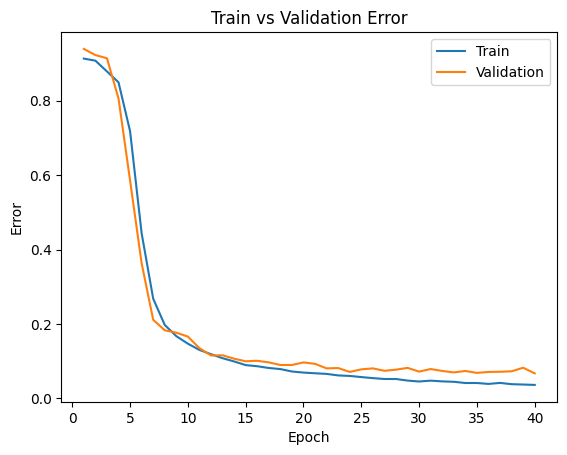

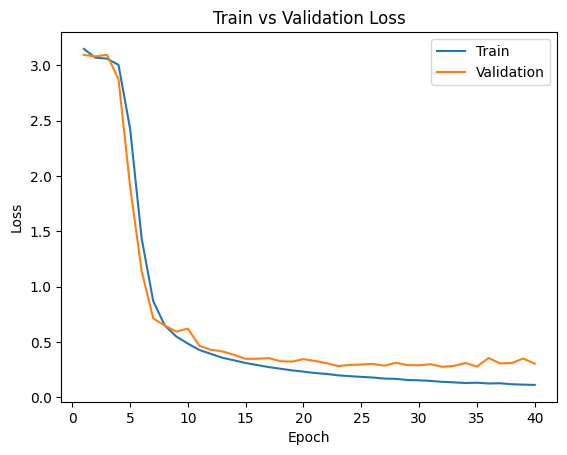

In [ ]:
path = "/content/gdrive/MyDrive/APS360-Notebooks/Project/training_output2/model_cnnv6_bs32_lr0.001_2024-04-06_00:49:07/"
model_path = path + get_model_name("cnnv6", batch_size=32, learning_rate=0.001, epoch=39)
plot_training_curve(model_path)

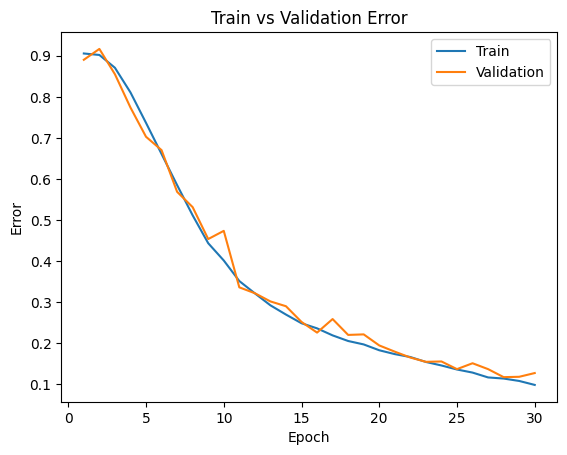

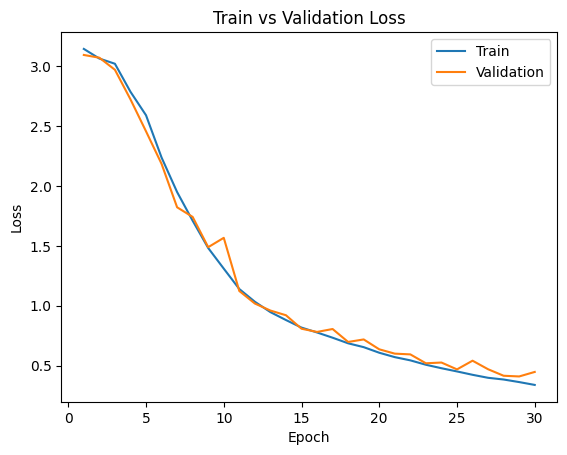

In [ ]:
path = "/content/gdrive/MyDrive/APS360-Notebooks/Project/training_output2/model_cnnv6_bs32_lr0.001_2024-04-06_00:38:33/"
model_path = path + get_model_name("cnnv6", batch_size=32, learning_rate=0.001, epoch=29)
plot_training_curve(model_path)

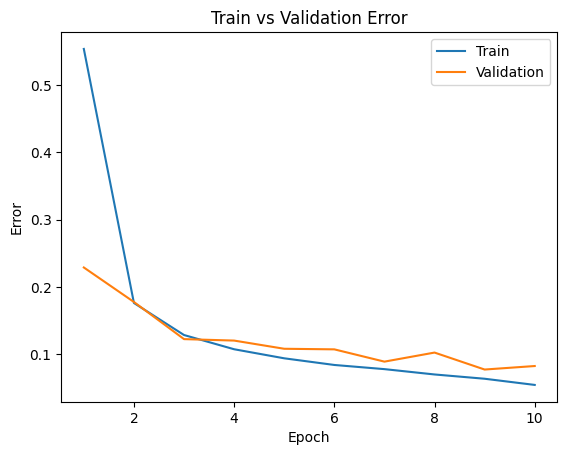

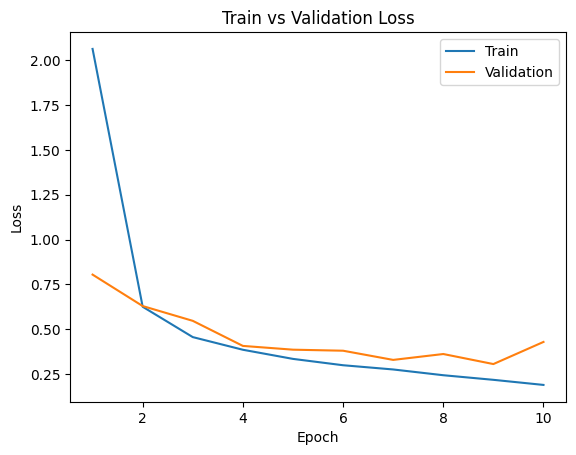

In [ ]:
path = "/content/gdrive/MyDrive/APS360-Notebooks/Project/training_output/"
model_path = path + get_model_name("cnnv1", batch_size=32, learning_rate=0.001, epoch=9)
plot_training_curve(model_path)

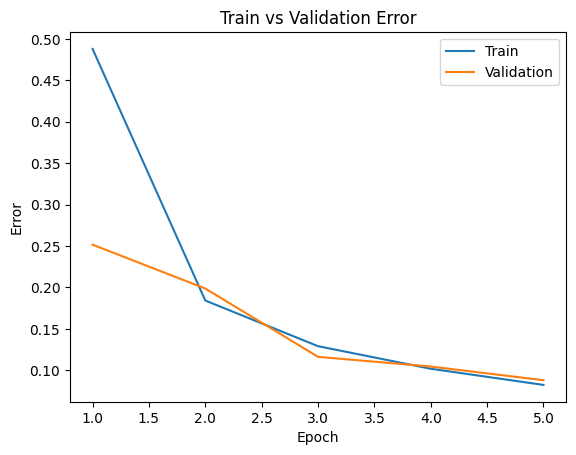

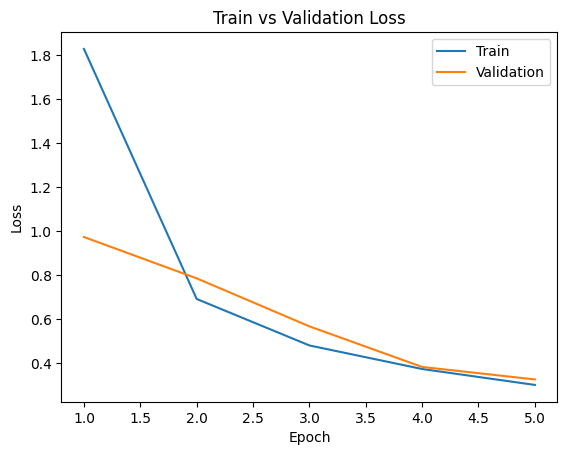

In [ ]:
path = "/content/gdrive/MyDrive/APS360-Notebooks/Project/training_output2/model_cnnv2_bs32_lr0.001_2024-03-31_22:27:58/"
model_path = path + get_model_name("cnnv2", batch_size=32, learning_rate=0.001, epoch=4)
plot_training_curve(model_path)

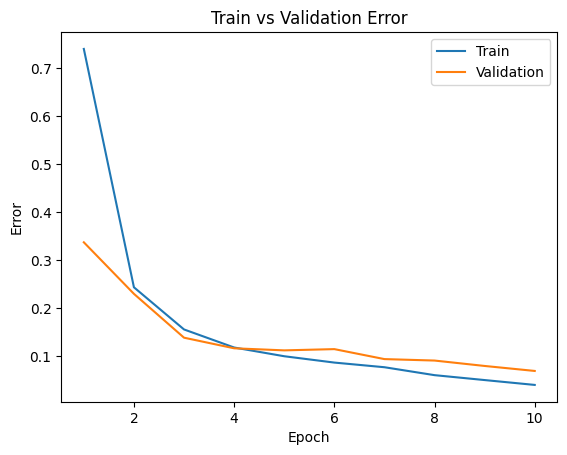

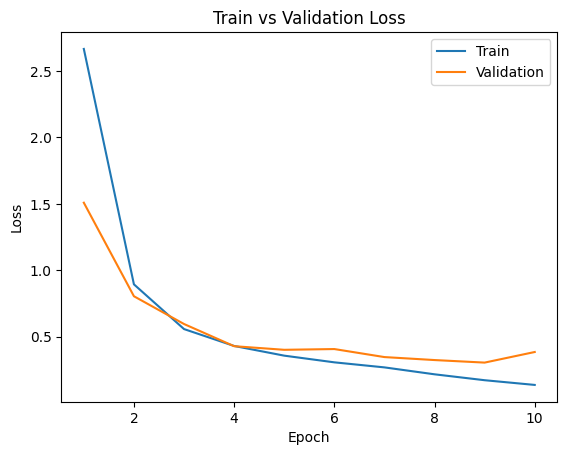

In [ ]:
path = "/content/gdrive/MyDrive/APS360-Notebooks/Project/training_output2/model_cnnv3_bs32_lr0.001_2024-03-31_23:02:30/"
model_path = path + get_model_name("cnnv3", batch_size=32, learning_rate=0.001, epoch=9)
plot_training_curve(model_path)

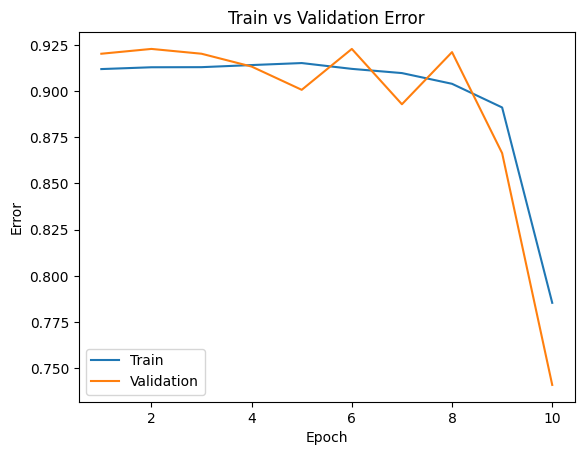

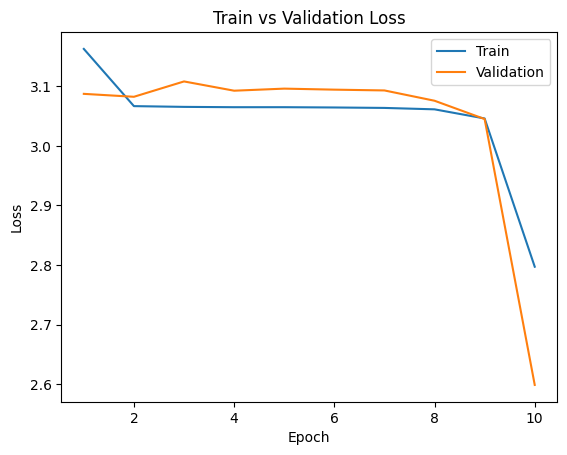

In [ ]:
path = "/content/gdrive/MyDrive/APS360-Notebooks/Project/training_output2/model_cnnv4_bs32_lr0.001_2024-03-31_23:23:27/"
model_path = path + get_model_name("cnnv4", batch_size=32, learning_rate=0.001, epoch=9)
plot_training_curve(model_path)

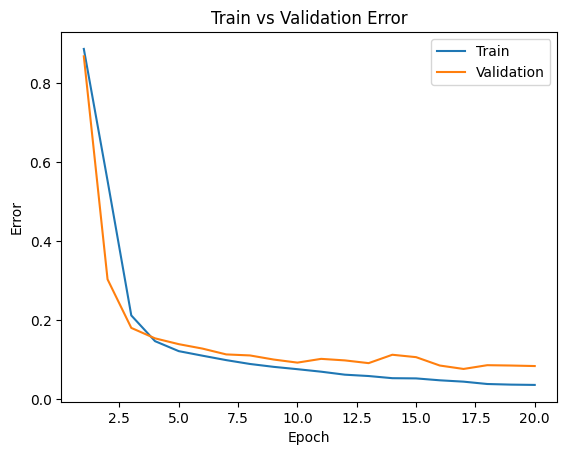

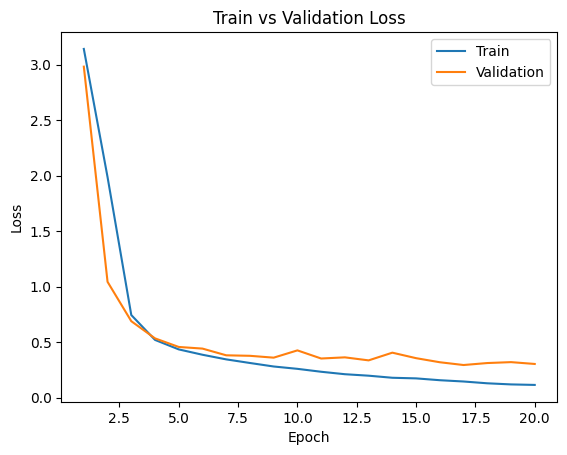

In [ ]:
path = "/content/gdrive/MyDrive/APS360-Notebooks/Project/training_output2/model_cnnv5_bs32_lr0.001_2024-04-01_00:08:57/"
model_path = path + get_model_name("cnnv5", batch_size=32, learning_rate=0.001, epoch=19)
plot_training_curve(model_path)

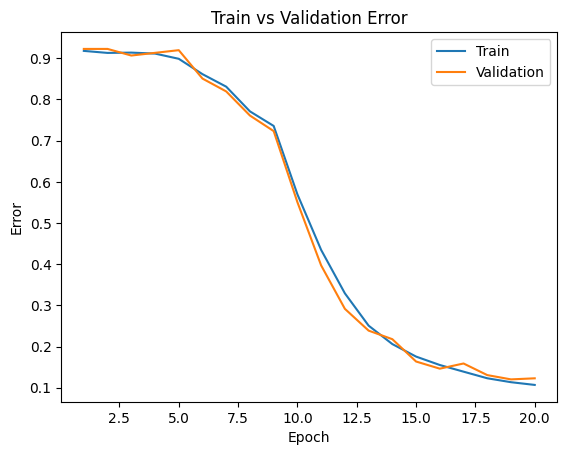

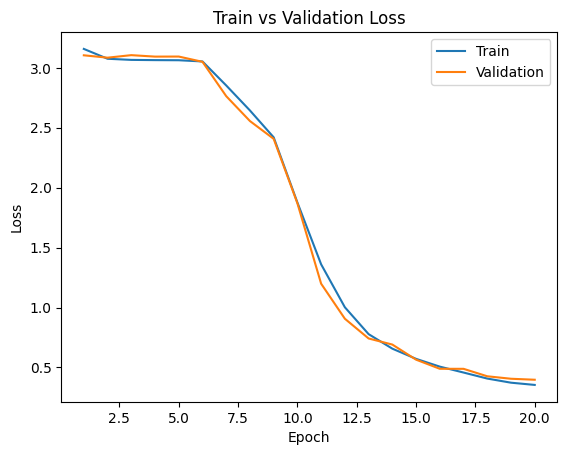

In [ ]:
path = "/content/gdrive/MyDrive/APS360-Notebooks/Project/training_output2/model_cnnv6_bs32_lr0.001_2024-04-02_22:06:26/"
model_path = path + get_model_name("cnnv6", batch_size=32, learning_rate=0.001, epoch=19)
plot_training_curve(model_path)

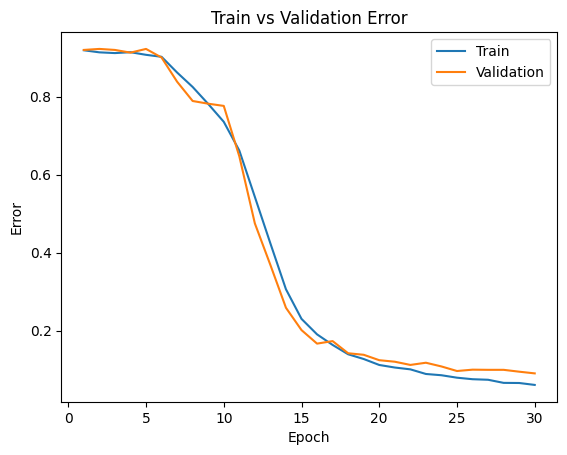

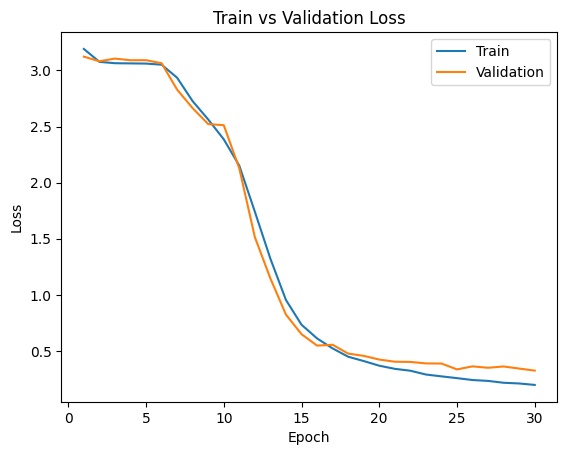

In [ ]:
path = "/content/gdrive/MyDrive/APS360-Notebooks/Project/training_output2/model_cnnv7_bs32_lr0.001_2024-04-02_22:55:25/"
model_path = path + get_model_name("cnnv7", batch_size=32, learning_rate=0.001, epoch=29)
plot_training_curve(model_path)

# CNN Test

In [ ]:
signs_dict = {
        'chevron': 0,
        'parking': 1,
        'pedestrian_cross': 2,
        'bicycle_only': 3,
        'keep_right': 4,
        'speed_limit': 5,
        'no_entry': 6,
        'no_heavy_vehicles': 7,
        'no_left_turn': 8,
        'no_overtaking': 9,
        'no_parking': 10,
        'no_right_turn': 11,
        'no_uturn': 12,
        'one_way_left': 13,
        'one_way_right': 14,
        'one_way_straight': 15,
        'stop': 16,
        'yield': 17,
        'children': 18,
        'curve_left': 19,
        'curve_right': 20,
        'road_bump': 21,
        'school_zone': 22,
        'stop_ahead': 23,
        'traffic_signal_ahead': 24,
        'merge_right': 25
    }

signs_list = list(signs_dict.keys())

In [ ]:
def confusion_mat(predicted_list, true_list, pred, true):
    count = 0
    for i in range(0,len(predicted_list)):
        if predicted_list[i] == pred and true_list[i] == true:
            count += 1
    return count

def get_test_accuracy(net, bs, lr, ep, path):
    model_path = path + get_model_name(net.name, batch_size=bs, learning_rate=lr, epoch=ep)
    state = torch.load(model_path)
    net.load_state_dict(state)
    criterion = nn.CrossEntropyLoss()
    test_err, test_loss, pred_list, true_list = evaluate_test(net, test_loader, criterion)

    return pred_list, true_list, 1 - test_err

def print_confusion_mat(pred_list, true_list, num_classes):
    for i in signs_list:
        print(i, end=', ')
    print("")
    for i in range(0, num_classes):
        print(signs_list[i], end=', ')
        for j in range(0, num_classes):
            print(confusion_mat(pred_list, true_list, pred=i, true=j), end=', ')
        print("")

def confusion_mat_to_csv(pred_list, true_list, num_classes):
    import copy
    import csv
    first_row = copy.deepcopy(signs_list)
    first_row.insert(0, "")
    mat = []
    mat.append(first_row)

    for i in range(0, num_classes):
        row = []
        row.append(signs_list[i])
        for j in range(0, num_classes):
            row.append(confusion_mat(pred_list, true_list, pred=i, true=j))
        mat.append(row)

    np_mat = np.array(mat)
    csv_file_path = "output.csv"
    with open(csv_file_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(np_mat)

In [ ]:
path = "/content/gdrive/MyDrive/APS360-Notebooks/Project/training_output2/model_cnnv6_bs32_lr0.001_2024-04-06_00:49:07/"
pred_list, true_list, test_acc = get_test_accuracy(net=CNN_v6(), bs=32, lr=0.001, ep=39, path=path)
print("The test accuracy is: ", test_acc)

The test accuracy is:  0.9162689804772234


In [ ]:
confusion_mat_to_csv(pred_list, true_list, 26)

# Entire Project Test

In [ ]:
def get_test_result(net, bs, lr, ep, img, signs_list, path):
    model_path = path + get_model_name(net.name, batch_size=bs, learning_rate=lr, epoch=ep)
    state = torch.load(model_path)
    net.load_state_dict(state)

    softmax = nn.Softmax(dim=1)
    output = softmax(net(img))
    max_value, predicted_output = torch.max(output, 1)
    sign_index = predicted_output.item()
    return (output, float(max_value), signs_list[sign_index])

In [ ]:
def img_to_tensor(img, transform):
        tensor_img = transform(img).unsqueeze(0)
        return tensor_img

In [ ]:
def run_project(signs_list, transform, input_path, yolo_model_path, cnn_model_path, net, bs, lr, ep):
    from ultralytics import YOLO

    yolo_model = YOLO(yolo_model_path)
    master_list = []

    for filename in os.listdir(input_path):
        if filename.endswith('.jpg') or filename.endswith('.JPEG') or filename.endswith('.png'):
            input_img = PIL.Image.open(input_path + filename).convert("RGB")
            # reduce input_img size
            resized_input_img = input_img.resize((input_img.width // 4, input_img.height // 4))
            result = yolo_model(input_img)
            package_list = []
            for box in result[0].boxes:
                if result[0].names[box.cls.item()]:
                    xyxy = box.xyxy.tolist()
                    cropped_img = input_img.crop(xyxy[0])
                    cropped_img = cropped_img.resize((150,150))
                    yolo_output_img = img_to_tensor(cropped_img, transform)
                    output, percentage, sign_type = get_test_result(net=net,
                                                                    bs=bs,
                                                                    lr=lr,
                                                                    ep=ep,
                                                                    img=yolo_output_img,
                                                                    signs_list=signs_list,
                                                                    path=cnn_model_path
                                                                    )
                    package_list.append((cropped_img, output, percentage, sign_type))
                    break
            master_list.append((resized_input_img, package_list))
    '''
    output is of this form
    [
        resized_input_img_1, [ (cropped_img_1, output_1, percentage_1, sign_type_1) ],
        resized_input_img_1, [ (cropped_img_2, output_2, percentage_2, sign_type_2) ],
        ...
        ...
    ]
    '''
    return master_list

In [ ]:
def print_project(master_list):
    for input_imgs in range(len(master_list)):
        print("---------------------")
        print("Original Input Image:")
        print("---------------------")
        display(master_list[input_imgs][0]) # original image
        for yolo_cropped in range(len(master_list[input_imgs][1])):
            print("---------------------")
            print("Output:")
            print("---------------------")
            display(master_list[input_imgs][1][yolo_cropped][0]) # yolo cropped image
            #print(master_list[input_imgs][1][yolo_cropped][1]) # full output (for debugging purposes)
            percentage = 100 * master_list[input_imgs][1][yolo_cropped][2] # percentage it is sure
            sign_type = master_list[input_imgs][1][yolo_cropped][3] # sign type prediction
            print(f"The model is {percentage}% sure it is {sign_type}.")

In [ ]:
signs_dict = {
        'chevron': 0,
        'parking': 1,
        'pedestrian_cross': 2,
        'bicycle_only': 3,
        'keep_right': 4,
        'speed_limit': 5,
        'no_entry': 6,
        'no_heavy_vehicles': 7,
        'no_left_turn': 8,
        'no_overtaking': 9,
        'no_parking': 10,
        'no_right_turn': 11,
        'no_uturn': 12,
        'one_way_left': 13,
        'one_way_right': 14,
        'one_way_straight': 15,
        'stop': 16,
        'yield': 17,
        'children': 18,
        'curve_left': 19,
        'curve_right': 20,
        'road_bump': 21,
        'school_zone': 22,
        'stop_ahead': 23,
        'traffic_signal_ahead': 24,
        'merge_right': 25
}
signs_list = list(signs_dict.keys())

transform = transforms.Compose([
        transforms.Resize((150, 150)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

input_path = "/content/gdrive/MyDrive/Project/test/" # path where all input images are
yolo_model_path = "/content/gdrive/MyDrive/Project/best.pt" #path where yolo model is
cnn_model_path = "/content/gdrive/MyDrive/Project/training_output2/model_cnnv6_bs32_lr0.001_2024-04-06_00:49:07/" #path where cnn model is

#specify net, bs, lr, ep, depending on the model name
master_list = run_project(signs_list, transform, input_path, yolo_model_path, cnn_model_path, net=CNN_v6(), bs=32, lr=0.001, ep=39)



0: 416x320 1 stop, 1 z_wj, 179.4ms
Speed: 2.4ms preprocess, 179.4ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 320)

0: 416x352 1 agat, 172.7ms
Speed: 2.0ms preprocess, 172.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 352)

0: 416x416 1 agat, 180.0ms
Speed: 2.7ms preprocess, 180.0ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)

0: 288x416 1 stop, 132.0ms
Speed: 2.0ms preprocess, 132.0ms inference, 1.9ms postprocess per image at shape (1, 3, 288, 416)

0: 288x416 1 stop, 1 ustap, 79.6ms
Speed: 1.6ms preprocess, 79.6ms inference, 0.8ms postprocess per image at shape (1, 3, 288, 416)

0: 416x288 1 stop, 73.1ms
Speed: 1.5ms preprocess, 73.1ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 288)

0: 192x416 1 z_wj, 69.5ms
Speed: 1.2ms preprocess, 69.5ms inference, 0.9ms postprocess per image at shape (1, 3, 192, 416)


---------------------
Original Input Image:
---------------------


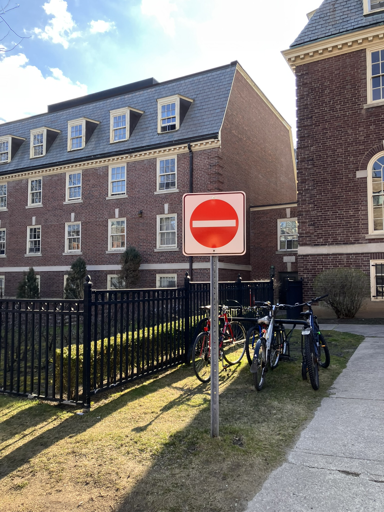

---------------------
Output:
---------------------


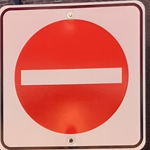

The model is 99.41834807395935% sure it is no_entry.
---------------------
Original Input Image:
---------------------


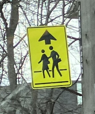

---------------------
Output:
---------------------


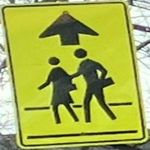

The model is 99.93126392364502% sure it is school_zone.
---------------------
Original Input Image:
---------------------


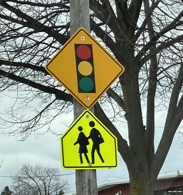

---------------------
Output:
---------------------


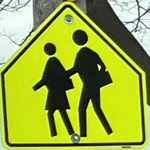

The model is 99.98000264167786% sure it is school_zone.
---------------------
Original Input Image:
---------------------


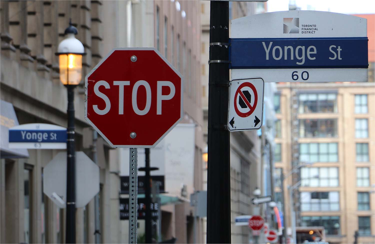

---------------------
Output:
---------------------


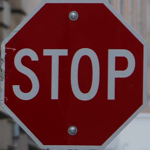

The model is 99.9998688697815% sure it is stop.
---------------------
Original Input Image:
---------------------


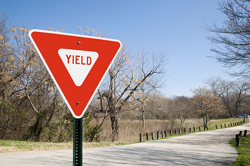

---------------------
Output:
---------------------


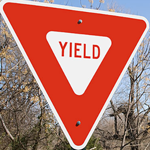

The model is 100.0% sure it is yield.
---------------------
Original Input Image:
---------------------


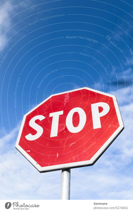

---------------------
Output:
---------------------


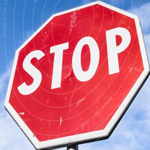

The model is 99.99940395355225% sure it is stop.
---------------------
Original Input Image:
---------------------


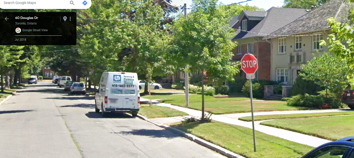

---------------------
Output:
---------------------


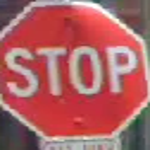

The model is 99.99974966049194% sure it is stop.


In [ ]:
# print out our inputs and corresponding outputs
print_project(master_list)

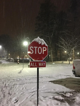

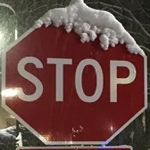

The model is 84.7332775592804% sure it is stop.


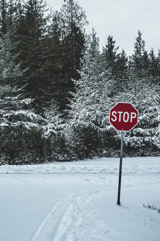

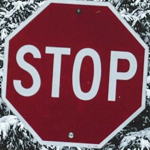

The model is 99.99961853027344% sure it is stop.


In [ ]:
# print out all the original images, yolo-cropped, classification
print_project(master_list)

# Baseline Model


In [ ]:
#using a KNN Classifier
#https://pyimagesearch.com/2016/08/08/k-nn-classifier-for-image-classification/ doesnt use sklearn?

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Define the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

In [ ]:
# Load data - done previously? could not run this cell
#batch_size = 32
#train_loader, val_loader, test_loader = get_data_loader(batch_size)

In [ ]:
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])
# one hot encoding for all tyes of signs
signs_dict = {
    'stop': (1.0, 0.0, 0.0, 0.0),
    'signal_ahead': (0.0, 1.0, 0.0, 0.0),
    'ped_cross': (0.0, 0.0, 1.0, 0.0),
    'keep_right': (0.0, 0.0, 0.0, 1.0),
}

path = f'/content/gdrive/MyDrive/dataset_imgs'

# Reload data ?
dataset = load_from_drive(path, signs_dict, transform)

currently loading:  /content/gdrive/MyDrive/dataset_imgs/stop/
currently loading:  /content/gdrive/MyDrive/dataset_imgs/signal_ahead/
currently loading:  /content/gdrive/MyDrive/dataset_imgs/ped_cross/
currently loading:  /content/gdrive/MyDrive/dataset_imgs/keep_right/


In [ ]:

# split data into features and labels
X = np.array([data[0] for data in dataset])  # Features (flattened pixel values)
y = np.array([data[1] for data in dataset])  # Labels (one-hot encoded)

# Shuffle data
indices = np.arange(len(dataset))
np.random.seed(1000)  # Fixed numpy random seed for reproducible shuffling
np.random.shuffle(indices)
X_shuffled = X[indices]
y_shuffled = y[indices]

print(len(dataset))
# Define training and testing splits
train_split = int(0.8 * len(dataset))  # 80% for training
X_train, X_test = X_shuffled[:train_split], X_shuffled[train_split:]
y_train, y_test = y_shuffled[:train_split], y_shuffled[train_split:]
print(X_train.shape)
print(y_train.shape)

1002
(801, 3, 150, 150)
(801, 4)


In [ ]:
# Train the classifier

#resize to two dimensions
num_samples = X_train.shape[0]
num_features = np.prod(X_train.shape[1:])
X_train = X_train.reshape((num_samples, num_features))

#resize to two dimensions
num_samples = X_test.shape[0]
num_features = np.prod(X_test.shape[1:])
X_test = X_test.reshape((num_samples, num_features))

knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

print(y_pred)
print(y_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of KNN baseline model:", accuracy)

In [ ]:
transform = transforms.Compose([
        transforms.ToTensor()
        #transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
    ])

# one hot encoding for all tyes of signs
signs_dict = {
    'stop': (1.0, 0.0, 0.0, 0.0),
    'signal_ahead': (0.0, 1.0, 0.0, 0.0),
    'ped_cross': (0.0, 0.0, 1.0, 0.0),
    'keep_right': (0.0, 0.0, 0.0, 1.0),
}

path = f'/content/gdrive/MyDrive/dataset_imgs'

# Reload data ?
dataset = load_from_drive(path, signs_dict, transform)

# split data into features and labels
X = np.array([data[0] for data in dataset])  # Features (flattened pixel values)
y = np.array([data[1] for data in dataset])  # Labels (one-hot encoded)

# Shuffle data
indices = np.arange(len(dataset))
np.random.seed(1000)  # Fixed numpy random seed for reproducible shuffling
np.random.shuffle(indices)
X_shuffled = X[indices]
y_shuffled = y[indices]

# Define training and testing splits
train_split = int(0.8 * len(dataset))  # 80% for training
X_train, X_test = X_shuffled[:train_split], X_shuffled[train_split:]
y_train, y_test = y_shuffled[:train_split], y_shuffled[train_split:]


In [ ]:

#Calculate the sum of RGB values along each column (color)
def avg_rgb_value(image_tensor):
  image_tensor = image_tensor.reshape(3, -1).T
  total_pixels = image_tensor.shape[0]
  r = 0
  g = 0
  b = 0
  for row in image_tensor:
    r += float(row[0])
    g += float(row[1])
    b += float(row[2])

  percent_red = r / total_pixels
  percent_green = g / total_pixels
  percent_blue = b / total_pixels
  avg_list = [percent_red, percent_green, percent_blue]
  return np.array(avg_list)

def train_and_test(train_data, train_label, test_data, test_label):
  # stop = np.array([0,0,0])
  # signal_ahead = np.array([0,0,0])
  # ped_cross = np.array([0,0,0])
  # keep_right = np.array([0,0,0])
  class_array = np.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0]])
  num_stop = 0.0
  num_signal_ahead = 0.0
  num_ped_cross= 0.0
  num_keep_right = 0.0

  for k, img in enumerate(train_data):
    rgb_avg = avg_rgb_value(img)

    sign_type = np.argmax(train_label[k])
    #print(sign_type)
    if sign_type == 0:
      class_array[0] = np.add(class_array[0], rgb_avg)
      num_stop+=1.0

    elif sign_type == 1:
      class_array[1] = np.add(class_array[1], rgb_avg)
      num_signal_ahead+=1.0

    elif sign_type == 2:
      class_array[2] = np.add(class_array[2], rgb_avg)
      num_ped_cross+=1.0

    elif sign_type == 3:
      class_array[3] = np.add(class_array[3], rgb_avg)
      num_keep_right+=1.0

  print(f"Num stops: {num_stop}")
  print(f"Num signal_ahead: {num_signal_ahead}")
  print(f"Num ped_cross: {num_ped_cross}")
  print(f"Num keep_right: {num_keep_right}")

  #mean rgb values for every class
  class_array[0] = class_array[0] / float(num_stop)
  class_array[1] = class_array[1] / float(num_signal_ahead)
  class_array[2] = class_array[2] / float(num_ped_cross)
  class_array[3] = class_array[3] / float(num_keep_right)
  print(class_array[0])
  print(class_array[1])
  print(class_array[2])
  print(class_array[3])

  correct = 0
  for j, img in enumerate(test_data):
    actual_sign_type = np.argmax(test_label[j])
    test_rgb_avg = avg_rgb_value(img)

    lowest_mse = 999999
    lowest_index = -1
    #find the most evenly matched mse
    for i, sign_class in enumerate(class_array):
      squared_diff = (test_rgb_avg - sign_class) ** 2
      mse = np.mean(squared_diff)
      if mse < lowest_mse:
        lowest_mse = mse
        lowest_index = i

    if lowest_index == actual_sign_type:
      correct += 1

  accuracy = correct / len(test_data)
  print(f"test accuracy is {accuracy}")



train_and_test(X_train, y_train, X_test, y_test)
